Stock price prediction

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime
import yfinance as yf

In [2]:

#defining start and end time
start = datetime.datetime(2011, 1, 1)  # Replace with your desired start date
end = datetime.datetime(2023, 8, 1)
df = yf.download('AAPL', start=start, end=end)
df.head()

#this is only for analysis part , we can use any stock to train our model

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,11.630000,11.795000,11.601429,11.770357,10.004129,445138400
2011-01-04,11.872857,11.875000,11.719643,11.831786,10.056340,309080800
2011-01-05,11.769643,11.940714,11.767857,11.928571,10.138603,255519600
2011-01-06,11.954286,11.973214,11.889286,11.918929,10.130406,300428800
2011-01-07,11.928214,12.012500,11.853571,12.004286,10.202959,311931200


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-25,193.330002,194.440002,192.919998,193.619995,193.619995,37283200
2023-07-26,193.669998,195.639999,193.320007,194.500000,194.500000,47471900
2023-07-27,196.020004,197.199997,192.550003,193.220001,193.220001,47460200
2023-07-28,194.669998,196.630005,194.139999,195.830002,195.830002,48291400
2023-07-31,196.059998,196.490005,195.259995,196.449997,196.449997,38824100


In [4]:
# we will drop columns which will be of less use to us
df = df.reset_index()
## reset index will change index from dat to any numaric form
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,11.630000,11.795000,11.601429,11.770357,445138400
1,11.872857,11.875000,11.719643,11.831786,309080800
2,11.769643,11.940714,11.767857,11.928571,255519600
3,11.954286,11.973214,11.889286,11.918929,300428800
4,11.928214,12.012500,11.853571,12.004286,311931200


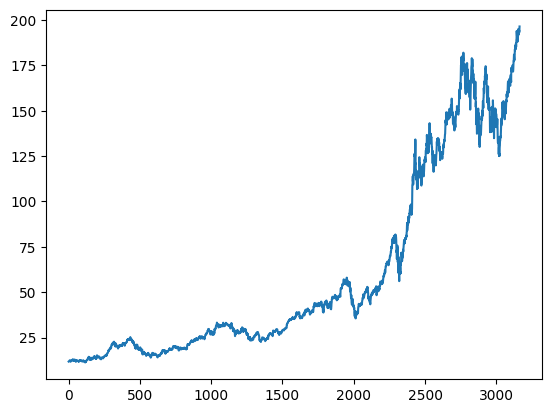

In [5]:
# Plotting the closing price of apple stock
plt.plot(df.Close)

In [6]:
## creating 100 days moving average
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3159    172.9063
3160    173.3922
3161    173.8141
3162    174.2341
3163    174.6826
Name: Close, Length: 3164, dtype: float64

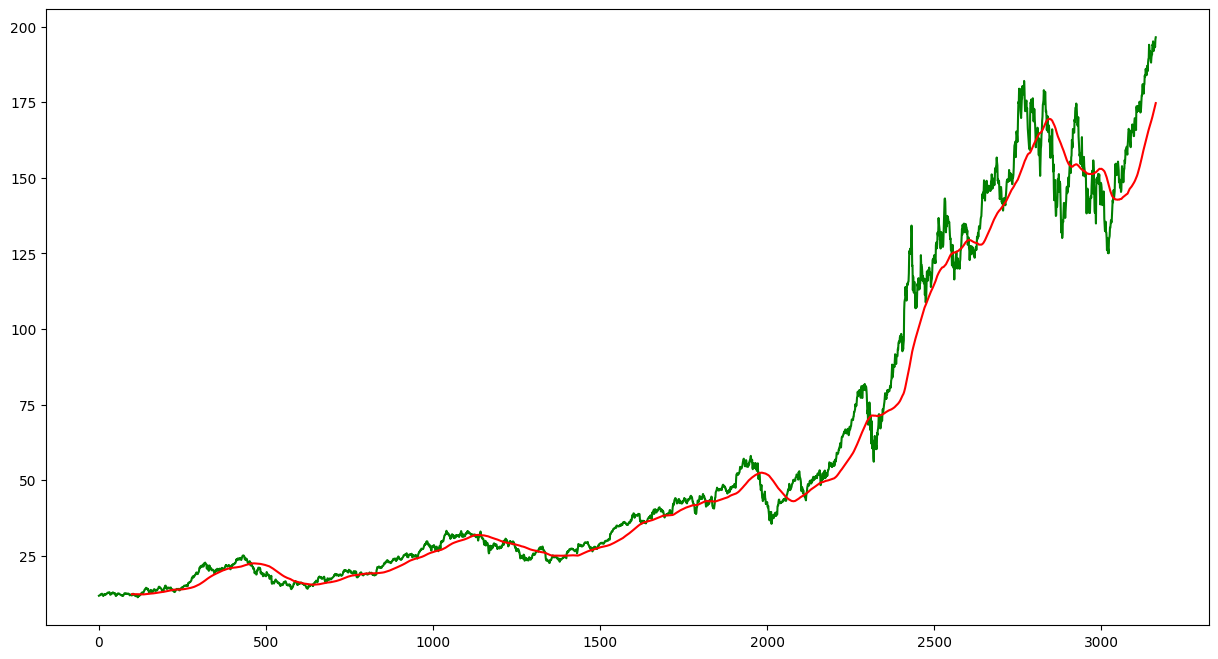

In [7]:
#plotting moving avg on closing graph
plt.figure(figsize = (15,8))
plt.plot(df.Close,'g')
plt.plot(ma100, 'r')
# r and g represents the colour red and grenn respectively

In [8]:
# creating 200 daqys moving average
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3159    157.94185
3160    158.18720
3161    158.45285
3162    158.72990
3163    159.01725
Name: Close, Length: 3164, dtype: float64

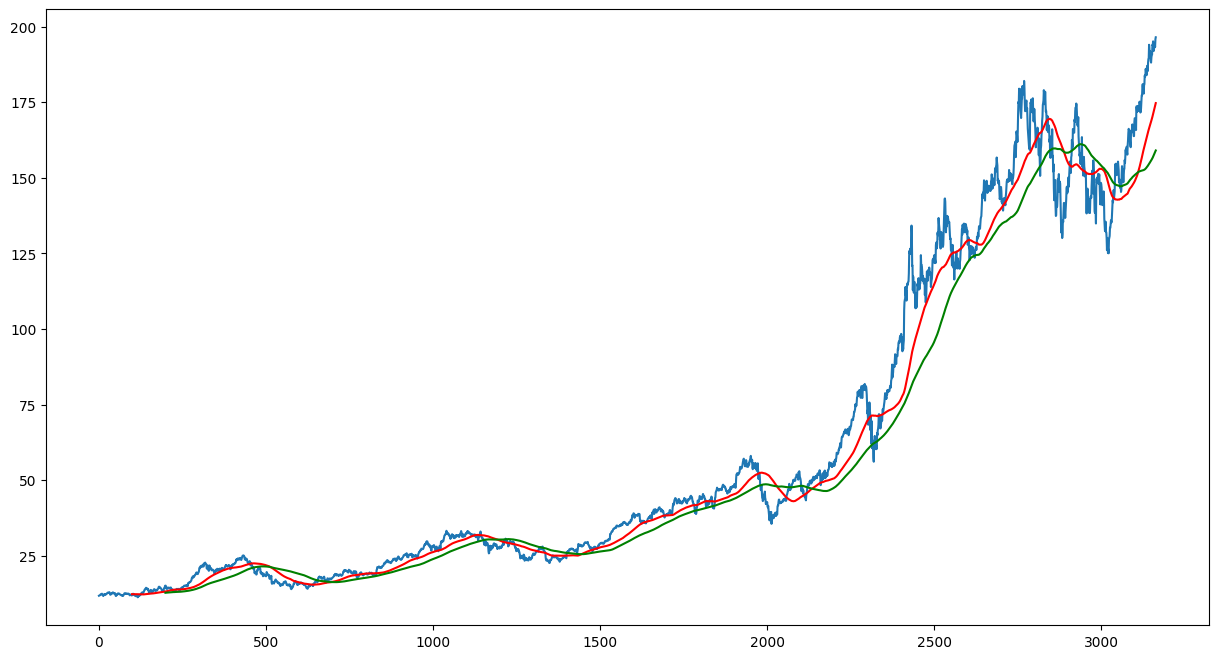

In [9]:
#plotting the graph of all three parameters
plt.figure(figsize = (15,8))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [10]:
df.shape
#to check total number of entries

(3164, 5)

In [11]:
#splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
#HEre we creating a dataframe stating with 0th indexs of closing column going till 70% of data
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
#here our dataframe will start fron 70% and go till 100%
print(data_training.shape)
print(data_testing.shape)

(2214, 1)
(950, 1)


In [12]:
#scaling down the data between 0 and 1 value
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array


array([[0.01063789],
       [0.01192192],
       [0.01394496],
       ...,
       [0.98933966],
       [0.99409501],
       [1.        ]])

In [13]:
x_train = []#to store the data that will be used for predicting in training part
y_train = []#to store the predicted data to check the working of model in training part itself

for i in range (100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i,0])

#converting x_train and y_train to nuumpy array so that we can pass it to our model

x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
x_train.shape

(2114, 100, 1)

In [15]:
#making the model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [16]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences= True,
               input_shape = (x_train.shape[1],1)))
#1 becase 100 value ios present at index 12 and other 1 because we are using only one column that is closing one

In [17]:
model.add(Dropout(0.2))
#adding dropout layer to prevent overfitting

In [18]:
##adding few more layers
#2nd layer
model.add(LSTM(units = 60, activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))


#3rd layer
model.add(LSTM(units = 80, activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))

#4th layer
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

In [19]:
model.add(Dense(units = 1))
#we have used only 1 dense layer because we have to just predict our closing price

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
#compiling model
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
67/67 [==============================] - 29s 340ms/step - loss: 0.0419
Epoch 2/50
67/67 [==============================] - 23s 340ms/step - loss: 0.0079
Epoch 3/50
67/67 [==============================] - 23s 339ms/step - loss: 0.0068
Epoch 4/50
67/67 [==============================] - 23s 340ms/step - loss: 0.0062
Epoch 5/50
67/67 [==============================] - 22s 330ms/step - loss: 0.0060
Epoch 6/50
67/67 [==============================] - 23s 337ms/step - loss: 0.0055
Epoch 7/50
67/67 [==============================] - 24s 354ms/step - loss: 0.0055
Epoch 8/50
67/67 [==============================] - 24s 353ms/step - loss: 0.0051
Epoch 9/50
67/67 [==============================] - 23s 343ms/step - loss: 0.0049
Epoch 10/50
67/67 [==============================] - 23s 343ms/step - loss: 0.0041
Epoch 11/50
67/67 [==============================] - 23s 342ms/step - loss: 0.0044
Epoch 12/50
67/67 [==============================] - 23s 341ms/step - loss: 0.0043
Epoch 13/50
6

In [22]:
model.save('Stock_Price_prediction')

In [23]:
data_testing.head()

,Close
2214,60.127499
2215,59.990002
2216,60.794998
2217,60.895000
2218,61.645000


In [24]:
#to predict the value for 2214 day we need its previous 100 days data which is presenty in our training data so we need to append this testing data with that list
past_100_days = data_training.tail(100)

In [25]:
final_df = past_100_days.append(data_testing, ignore_index=True)

<ipython-input-25-27e824f269e9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [26]:
final_df.head()

,Close
0,44.575001
1,43.767502
2,43.325001
3,44.910000
4,45.634998


In [27]:
#scaling the data between 0 to 1
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00816327],
       [0.0028898 ],
       [0.        ],
       ...,
       [0.97890615],
       [0.99595105],
       [1.        ]])

In [28]:
input_data.shape

(1050, 1)

In [29]:
x_test=[]
y_test=[]
for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [30]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(950, 100, 1)
(950,)


In [31]:
#making predictions

y_predicted = model.predict(x_test)
y_predicted.shape

30/30 [==============================] - 3s 96ms/step


(950, 1)

In [32]:
#y_predicted and y_test shape are same
y_test

array([0.1097306 , 0.10883266, 0.11408978, 0.11474286, 0.11964082,
       0.12367347, 0.11426937, 0.1142204 , 0.12319999, 0.13472654,
       0.13746939, 0.13686531, 0.13704488, 0.14062039, 0.14177961,
       0.14514288, 0.14475101, 0.14884898, 0.14586125, 0.15095512,
       0.15314287, 0.15182042, 0.14675919, 0.14483267, 0.14445714,
       0.15195101, 0.14855511, 0.15435101, 0.15338775, 0.14834286,
       0.14065308, 0.14439182, 0.1506612 , 0.15903672, 0.152849  ,
       0.15539594, 0.15913467, 0.16026121, 0.1662857 , 0.17397549,
       0.17487347, 0.17377958, 0.17423672, 0.1732898 , 0.18073469,
       0.18117549, 0.19038368, 0.19020406, 0.19301223, 0.19648979,
       0.20742858, 0.20266121, 0.20653059, 0.2042286 , 0.21206531,
       0.2225796 , 0.22372243, 0.23454693, 0.22755917, 0.22537142,
       0.23173876, 0.23743675, 0.23391022, 0.23575512, 0.23825308,
       0.23675102, 0.22146941, 0.23573878, 0.24659591, 0.24582856,
       0.22238369, 0.22099592, 0.23763266, 0.24187757, 0.24801

In [33]:
y_predicted

array([[0.13252473],
       [0.13433377],
       [0.13615054],
       [0.13799036],
       [0.13986805],
       [0.14181438],
       [0.14387256],
       [0.1459812 ],
       [0.14802939],
       [0.14998534],
       [0.15192352],
       [0.15397763],
       [0.15622033],
       [0.15865882],
       [0.1612789 ],
       [0.16404125],
       [0.16690683],
       [0.16981518],
       [0.17271526],
       [0.17551592],
       [0.1781899 ],
       [0.18073948],
       [0.183151  ],
       [0.1853484 ],
       [0.1872307 ],
       [0.18871552],
       [0.18984196],
       [0.19065878],
       [0.19127928],
       [0.19180486],
       [0.19226061],
       [0.19256029],
       [0.19265112],
       [0.19258374],
       [0.19251662],
       [0.19254154],
       [0.19272152],
       [0.19310866],
       [0.19372304],
       [0.19459426],
       [0.19577941],
       [0.19729434],
       [0.1990851 ],
       [0.20105304],
       [0.20306715],
       [0.20506123],
       [0.20698847],
       [0.208

In [34]:
#from the above entries it is difficult to find which all pricce are matching are not
#so we need to again scale it up
#finding scaling down factor
scaler.scale_

array([0.00653061])

In [35]:
scale_factor= 1/0.00653061
y_predicted = y_predicted* scale_factor
y_test = y_test * scale_factor

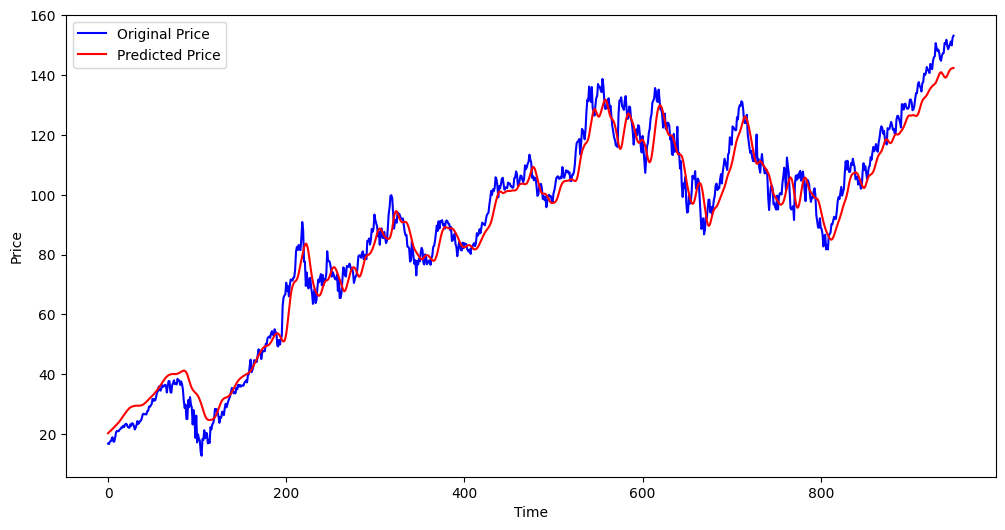

In [36]:
#plotting original price against predicted price
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')#x label
plt.ylabel('Price')#y lable
plt.legend()# to describew every area in a graph
plt.show()